In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [2]:
# Load the data
data = pd.read_csv("Forestfires.csv")

In [3]:
# Select the columns of interest: 'DC' and 'FFMC'
data = data[["DC", "FFMC"]]

In [4]:
# Display the first few rows of the selected data
print(data.head())

      DC  FFMC
0  669.1  90.6
1  686.9  90.6
2   77.5  91.7
3  102.2  89.3
4  488.0  92.3


In [5]:
# Define the prediction target
predict = "DC"

In [6]:
# Prepare the data for training and predictions
x_ffmc = np.array(data[["FFMC"]])
y = np.array(data[predict])

In [7]:
# Split the data into training and testing sets for FFMC-based model
x_ffmc_train, x_ffmc_test, y_train, y_test = train_test_split(x_ffmc, y, test_size=0.2, random_state=42)

In [8]:
# Train the model for FFMC
linear_ffmc = linear_model.LinearRegression()
linear_ffmc.fit(x_ffmc_train, y_train)

LinearRegression()

In [9]:
# Evaluate the FFMC-based model
acc_ffmc = linear_ffmc.score(x_ffmc_test, y_test)
print(f"FFMC Model Accuracy: {acc_ffmc}")

FFMC Model Accuracy: 0.053913374279833004


In [10]:
# Save the model to a file
with open("forestfires_ffmc.pickle", "wb") as f:
    pickle.dump(linear_ffmc, f)

In [11]:
# Load the model from the file
with open("forestfires_ffmc.pickle", "rb") as f:
    linear_ffmc = pickle.load(f)

In [12]:
# Make predictions for FFMC-based model
predictions_ffmc = linear_ffmc.predict(x_ffmc)

In [13]:
# Print predictions, input features, and actual values for FFMC model
for i in range(len(predictions_ffmc)):
    print(f"FFMC Model Predicted: {predictions_ffmc[i]}, FFMC: {x_ffmc[i]}, Actual: {y[i]}")

FFMC Model Predicted: 529.5617540887192, FFMC: [90.6], Actual: 669.1
FFMC Model Predicted: 529.5617540887192, FFMC: [90.6], Actual: 686.9
FFMC Model Predicted: 570.8281331341645, FFMC: [91.7], Actual: 77.5
FFMC Model Predicted: 480.7923970350116, FFMC: [89.3], Actual: 102.2
FFMC Model Predicted: 593.3370671589528, FFMC: [92.3], Actual: 488.0
FFMC Model Predicted: 593.3370671589528, FFMC: [92.3], Actual: 495.6
FFMC Model Predicted: 563.3251551259018, FFMC: [91.5], Actual: 608.2
FFMC Model Predicted: 544.5677101052447, FFMC: [91.], Actual: 692.6
FFMC Model Predicted: 600.8400451672155, FFMC: [92.5], Actual: 698.6
FFMC Model Predicted: 600.8400451672155, FFMC: [92.5], Actual: 698.6
FFMC Model Predicted: 612.0945121796094, FFMC: [92.8], Actual: 713.0
FFMC Model Predicted: 540.8162211011136, FFMC: [90.9], Actual: 686.5
FFMC Model Predicted: 615.846001183741, FFMC: [92.9], Actual: 699.6
FFMC Model Predicted: 630.8519572002665, FFMC: [93.3], Actual: 713.9
FFMC Model Predicted: 570.82813313416

In [14]:
# Plot the results
style.use("ggplot")
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

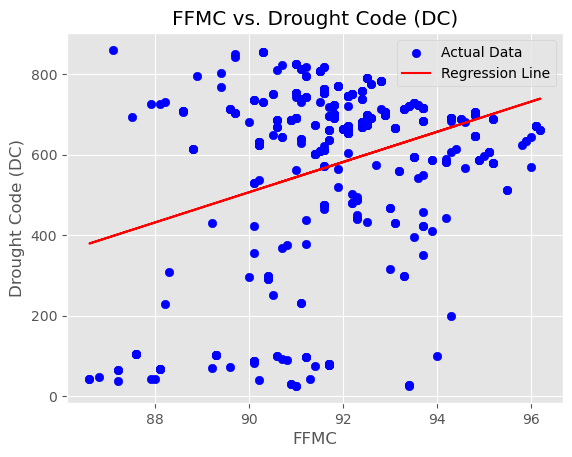

In [15]:
# Scatter plot for 'FFMC' vs 'DC'
plt.scatter(data["FFMC"], data["DC"], color="blue", label="Actual Data")
plt.plot(data["FFMC"], predictions_ffmc, color="red", label="Regression Line")
plt.xlabel("FFMC")
plt.ylabel("Drought Code (DC)")
plt.title("FFMC vs. Drought Code (DC)")
plt.legend()

In [16]:
plt.tight_layout()
plt.show()

# Display the first few rows of the data
print(data.head())

<Figure size 640x480 with 0 Axes>

      DC  FFMC
0  669.1  90.6
1  686.9  90.6
2   77.5  91.7
3  102.2  89.3
4  488.0  92.3
